# Notebook to train a DNN for card play

### Libraries

We use the keras library for building, training and evaluating the network. A tutorial for keras can be found on (https://keras.io/) or https://www.tensorflow.org/guide/keras. There are different implementations of keras, here I will use the one build on tensorflow.


In [50]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

Create dataframe with all the better than average player

In [66]:
df_stat = pd.read_json("data/stat/player_all_stat.json")
df_stat = df_stat.sort_values(by='mean', ascending=False)
mean = df_stat['mean'].mean()
df_stat = df_stat.drop(df_stat[df_stat['mean'] < mean+20].index)
df_stat.shape

(55, 4)

In [68]:
cards = [
    # Diamonds
    'DA', 'DK', 'DQ', 'DJ', 'D10', 'D9', 'D8', 'D7', 'D6',
    # Hearts
    'HA', 'HK', 'HQ', 'HJ', 'H10', 'H9', 'H8', 'H7', 'H6',
    # Spades
    'SA', 'SK', 'SQ', 'SJ', 'S10', 'S9', 'S8', 'S7', 'S6',
    # Clubs
    'CA', 'CK', 'CQ', 'CJ', 'C10', 'C9', 'C8', 'C7', 'C6'
]

forehand = ['FH']

user = ['user']
trump = ['trump']
cols = np.concatenate([cards,forehand,trump])
print(cols)
df = pd.DataFrame(columns=cols)

['DA' 'DK' 'DQ' 'DJ' 'D10' 'D9' 'D8' 'D7' 'D6' 'HA' 'HK' 'HQ' 'HJ' 'H10'
 'H9' 'H8' 'H7' 'H6' 'SA' 'SK' 'SQ' 'SJ' 'S10' 'S9' 'S8' 'S7' 'S6' 'CA'
 'CK' 'CQ' 'CJ' 'C10' 'C9' 'C8' 'C7' 'C6' 'FH' 'trump']


In [53]:
# import os
# from jass.logs.game_obs_action_log_entry import GameObsActionLogEntry
# import json
#
# for file in os.listdir('C:/dev/git/dl4g/notebooks/data/games/trump'):
#     with open("C:/dev/git/dl4g/notebooks/data/games/trump/"+file, "r") as file:
#         lines = file.readlines()
#
#         for line in lines:
#             line = json.loads(line.strip())
#             obs_log = GameObsActionLogEntry.from_json(line)
#
#             if obs_log.player_id in df_stat["id"]:
#                 row = np.concatenate([obs_log.obs.hand,[obs_log.obs.forehand],[obs_log.action]])
#                 df.loc[len(df.index)] =row
#
#
#
# df.head()

In [69]:
#df.to_pickle("trump_df.pkl") #read with
df = pd.read_pickle("trump_df22.pkl")
print(df.shape)
print(df['trump'].value_counts())

(549401, 39)
10    207482
5      66221
2      61294
3      61157
4      54032
1      50315
0      48900
Name: trump, dtype: int64


In [70]:
print(df['trump'].value_counts())
df = df[~df.id.isin(df_stat.id.index)]
print(df['trump'].value_counts())

10    207482
5      66221
2      61294
3      61157
4      54032
1      50315
0      48900
Name: trump, dtype: int64
10    206972
5      65995
2      61135
3      60986
4      53799
1      50209
0      48787
Name: trump, dtype: int64


In [71]:
df = df.sort_values(by='trump')
df
df.drop(df.tail(140_000).index, inplace = True)
df = df.sample(frac=1).reset_index(drop=True)
print(df.head())
print(df['trump'].value_counts())

  DA DK DQ DJ D10 D9 D8 D7 D6 HA  ... CQ CJ C10 C9 C8 C7 C6  FH trump id
0  0  1  0  0   0  0  0  0  0  0  ...  1  1   1  0  0  0  1   0     3  0
1  0  1  0  1   0  0  1  0  0  0  ...  0  0   0  0  0  0  0  -1    10  0
2  0  0  0  0   1  0  1  0  1  0  ...  1  0   0  0  0  0  1   0     1  0
3  1  0  0  1   1  1  0  0  1  0  ...  0  0   0  0  1  0  0   0     0  0
4  0  0  1  0   1  0  0  1  0  0  ...  0  0   0  0  1  1  1   0     5  0

[5 rows x 39 columns]
10    66972
5     65995
2     61135
3     60986
4     53799
1     50209
0     48787
Name: trump, dtype: int64


In [72]:
df.trump = df.trump.astype('category')
df[cards + forehand] = df[cards + forehand].astype(bool)
df.trump.cat.rename_categories({10: 6}, inplace=True)

df.head()

df.trump.value_counts()
trump = df.pop('trump')
df.pop('id')
print(trump.unique())
y_train = tf.keras.utils.to_categorical(trump)

print(df.head())

[3, 6, 1, 0, 5, 2, 4]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]
      DA     DK     DQ     DJ    D10     D9     D8     D7     D6     HA  ...  \
0  False   True  False  False  False  False  False  False  False  False  ...   
1  False   True  False   True  False  False   True  False  False  False  ...   
2  False  False  False  False   True  False   True  False   True  False  ...   
3   True  False  False   True   True   True  False  False   True  False  ...   
4  False  False   True  False   True  False  False   True  False  False  ...   

      CA     CK     CQ     CJ    C10     C9     C8     C7     C6     FH  
0  False  False   True   True   True  False  False  False   True  False  
1  False  False  False  False  False  False  False  False  False   True  
2  False  False   True  False  False  False  False  False   True  False  
3  False   True  False  False  False  False   True  False  False  False  
4  False  False  False  False  False  False   True   True   True  False  

[5 rows

C:\Users\olive_000\anaconda3\envs\adml\lib\site-packages\pandas\core\arrays\categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [73]:
from tensorflow.keras import regularizers
model = keras.Sequential()
model.add(keras.layers.Dense(37, activation='relu', input_shape=[37]))
model.add(keras.layers.Dense(300, activation="relu"
,kernel_regularizer=regularizers.l2(0.001)))
# model.add(tf.keras.layers.Dropout(0.3)),
model.add(keras.layers.Dense(300, activation="relu"
,kernel_regularizer=regularizers.l2(0.001)))
# model.add(tf.keras.layers.Dropout(0.3)),
model.add(keras.layers.Dense(300, activation="relu"
,kernel_regularizer=regularizers.l2(0.001)))
# model.add(tf.keras.layers.Dropout(0.3)),
model.add(keras.layers.Dense(300, activation="relu"
,kernel_regularizer=regularizers.l2(0.001)))
# model.add(tf.keras.layers.Dropout(0.3)),
model.add(keras.layers.Dense(300, activation="relu"
,kernel_regularizer=regularizers.l2(0.001)))
# model.add(tf.keras.layers.Dropout(0.3)),
model.add(keras.layers.Dense(300, activation="relu"
,kernel_regularizer=regularizers.l2(0.001)))
# model.add(tf.keras.layers.Dropout(0.3)),
model.add(keras.layers.Dense(300, activation="relu"
,kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.Dense(300, activation="relu"
,kernel_regularizer=regularizers.l2(0.001)))

model.add(keras.layers.Dense(7, activation='softmax'))


lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=len(df)*1000,
  decay_rate=1,
  staircase=False)



model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
              metrics=['accuracy'])

In [74]:
from keras.callbacks import EarlyStopping

print(df.shape)
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(df.values, y_train, validation_split=0.25, epochs=80, batch_size=10_000,
              callbacks =[early_stop]
                    )

(407883, 37)
Epoch 1/80
31/31 [==============================] - 2s 43ms/step - loss: 3.2373 - accuracy: 0.3212 - val_loss: 2.5297 - val_accuracy: 0.4436
Epoch 2/80
31/31 [==============================] - 1s 36ms/step - loss: 2.1922 - accuracy: 0.5036 - val_loss: 1.8900 - val_accuracy: 0.5672
Epoch 3/80
31/31 [==============================] - 1s 36ms/step - loss: 1.6988 - accuracy: 0.6117 - val_loss: 1.5286 - val_accuracy: 0.6529
Epoch 4/80
31/31 [==============================] - 1s 36ms/step - loss: 1.4369 - accuracy: 0.6776 - val_loss: 1.3596 - val_accuracy: 0.6953
Epoch 5/80
31/31 [==============================] - 1s 37ms/step - loss: 1.3138 - accuracy: 0.7071 - val_loss: 1.2639 - val_accuracy: 0.7176
Epoch 6/80
31/31 [==============================] - 1s 36ms/step - loss: 1.2291 - accuracy: 0.7253 - val_loss: 1.2154 - val_accuracy: 0.7191
Epoch 7/80
31/31 [==============================] - 1s 36ms/step - loss: 1.1718 - accuracy: 0.7347 - val_loss: 1.1541 - val_accuracy: 0.7356


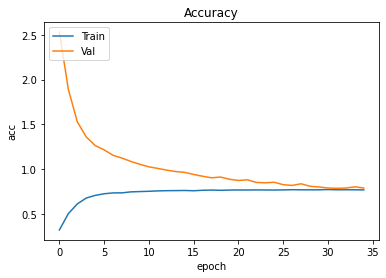

In [75]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

In [76]:
model.save('models/v8')

INFO:tensorflow:Assets written to: models/v8\assets
